In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import seaborn as sns
import math

In [2]:
df = pd.read_csv("../data/RawData/AGZD.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1582 non-null   object 
 1   Open       1582 non-null   float64
 2   High       1582 non-null   float64
 3   Low        1582 non-null   float64
 4   Close      1582 non-null   float64
 5   Adj Close  1582 non-null   float64
 6   Volume     1582 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 86.6+ KB


In [3]:
df.isnull().sum() #checking if there are Null values in the dataset; if none we wont use encoding tools to impute values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

(array([  4.,   2.,   3.,   4.,   4.,  37., 749., 414., 150., 215.]),
 array([42.79000092, 43.5310009 , 44.27200089, 45.01300087, 45.75400085,
        46.49500084, 47.23600082, 47.97700081, 48.71800079, 49.45900078,
        50.20000076]),
 <BarContainer object of 10 artists>)

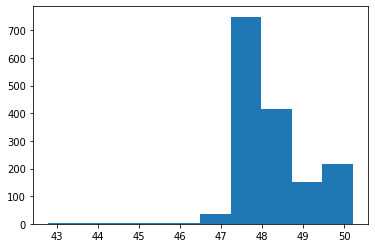

In [4]:
plt.hist(df["Low"])
#shows that price volatility often hits 47. something more frequently (if it hits the daily lows)

No handles with labels found to put in legend.


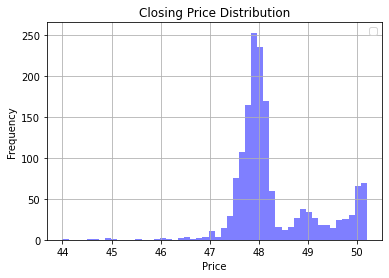

In [5]:
df["Close"].hist(bins=50, color="blue", alpha=0.5)
plt.title("Closing Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("histogram_closing_price.png", dpi=300)
plt.show()
#messy but ok (just messing around)

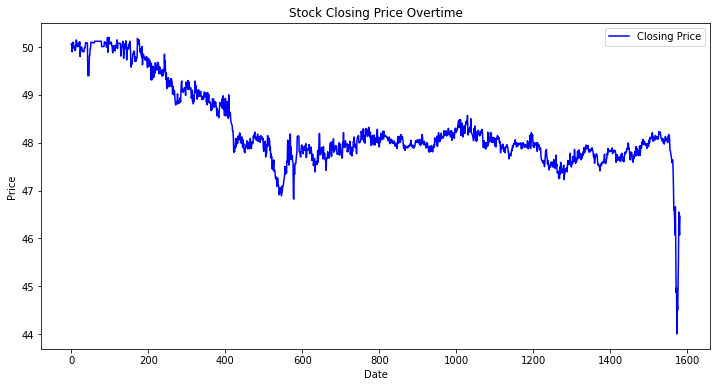

In [6]:
#time series analysis of the stock
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.title("Stock Closing Price Overtime")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig("time_series_analysis.png", dpi=300)
plt.show()


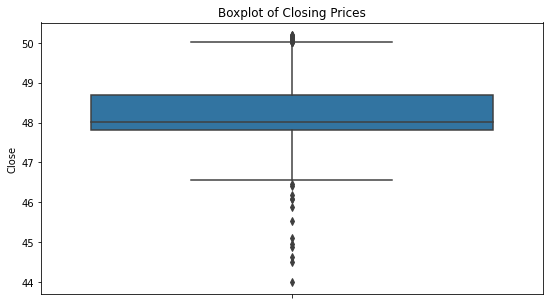

In [7]:
#to show outliers in the data
plt.figure(figsize=(9, 5))
sns.boxplot(y=df["Close"])
plt.title("Boxplot of Closing Prices")
plt.savefig("Boxplot_closing_price.png", dpi=300)
plt.show()
#so theyre seems to be extreme outliers so what wil we do to this is to make sure that the outliers are removed or replaced with the mean of all closing prices

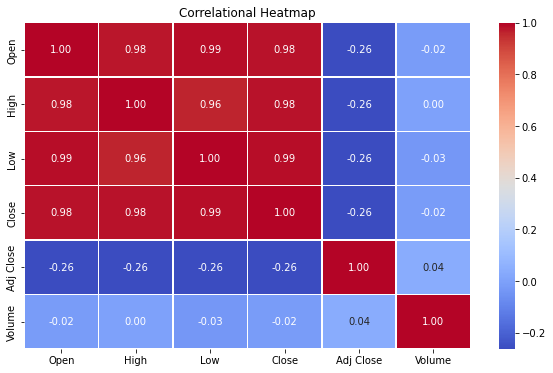

In [8]:
plt.figure(figsize=(10, 6))

# Compute correlation matrix correctly
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlational Heatmap")

# Save before showing
plt.savefig("correlational_heatmap.png", dpi=300)
plt.show()
#good so far, the correlational heat map suggests that open, high, close  have a positive correlation


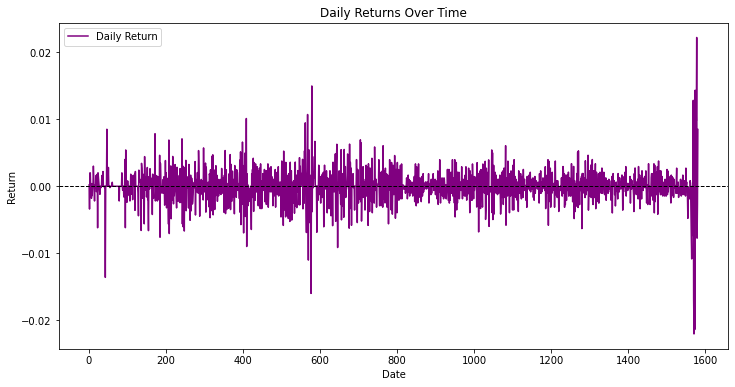

In [9]:
#volatility analysis
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.savefig("Volatility analysis.png", dpi=300)
plt.show()
#the data suggests that the returns of the stock generatively gets lower overtime

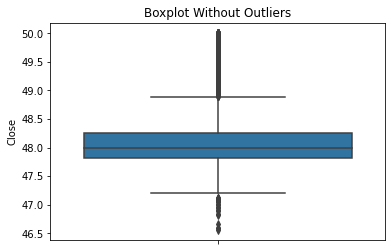

In [10]:
#removing outliers
Q1 = df["Close"].quantile(0.25)
Q3 = df["Close"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Close"] >= Q1 - 1.5 * IQR) & (df["Close"] <= Q3 + 1.5 * IQR)]

sns.boxplot(y=df["Close"])
plt.title("Boxplot Without Outliers")
plt.savefig("dataset_after_outlier_detection_and_removal.png")
plt.show()

#fixed data with no outliers

In [20]:
#feature engineering
df["SMA_500"] = ta.trend.SMAIndicator(df["Close"], window=500).sma_indicator()
df["MACD"] = ta.trend.MACD(df["Close"]).macd()
df["SMA_50"] = ta.trend.SMAIndicator(df["Close"], window=50).sma_indicator()
df["RSI"] = ta.momentum.RSIIndicator(df["Close"], window=14).rsi()
df["ADX"] = ta.trend.ADXIndicator(df["High"], df["Low"], df["Close"]).adx()
df["Stoch"] = ta.momentum.StochasticOscillator(df["High"], df["Low"], df["Close"]).stoch()
df["MFI"] = ta.volume.MFIIndicator(df["High"], df["Low"], df["Close"], df["Volume"]).money_flow_index()

/home/creiann/.local/lib/python3.6/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/creiann/.local/lib/python3.6/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [22]:
#cleaning out the null values
df.fillna(0, inplace=True)

#check
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,SMA_500,MACD,SMA_50,RSI,ADX,Stoch,MFI
2,2013-12-20,49.900002,49.900002,49.900002,49.900002,43.837894,200,-0.003395,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,2013-12-23,49.820000,50.000000,49.820000,50.000000,43.925762,15000,0.002004,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
7,2013-12-30,49.980000,49.980000,49.980000,49.980000,43.930157,6000,-0.001797,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8,2013-12-31,50.000000,50.000000,50.000000,50.000000,43.947731,10000,0.000400,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
9,2014-01-02,49.930000,49.930000,49.930000,49.930000,43.886215,200,-0.001400,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,2020-03-09,46.860001,47.340000,46.860001,47.099998,46.996574,42400,-0.007585,47.82194,-0.176826,48.0032,16.849772,44.753007,17.021127,21.344574
1565,2020-03-10,46.980000,47.090000,46.180000,46.590000,46.487698,45100,-0.010828,47.81872,-0.247528,47.9740,11.489117,47.684552,19.617216,10.318197
1566,2020-03-11,46.349998,46.900002,46.130001,46.590000,46.487698,12100,0.000000,47.81550,-0.300100,47.9440,11.489117,50.432661,22.330079,5.687368
1569,2020-03-16,45.180000,47.000000,44.470001,46.660000,46.557541,135200,0.012807,47.81226,-0.332286,47.9142,15.755522,53.456836,59.510827,3.624924


In [23]:
#now just to save the data and do data analysis 
df.to_csv("../data/Filtered/AGZD_fixed.csv", index=False)